# Regression Model
# Estimate House price

### Import data base

In [1]:
import pandas as pd

In [2]:
df= pd.read_csv(r'C:\Users\daniel.roman\Documents\StatisticsII\synthetic_house_prices.csv', sep=',')

In [3]:
# Cambiar los nombres de las columnas a español
df.columns = [
    'Metros_Cuadrados', 'Habitaciones', 'Banos', 'Edad', 'Distancia_al_Centro',
    'Jardin', 'Piscina', 'Garaje', 'Precio'
]

In [4]:
# Guardar el nuevo dataset con los nombres de columnas en español
file_path_spanish = r'C:\Users\daniel.roman\Documents\StatisticsII\synthetic_house_prices_spanish.csv'
df.to_csv(file_path_spanish, index=False)

In [5]:
df.head()

,Metros_Cuadrados,Habitaciones,Banos,Edad,Distancia_al_Centro,Jardin,Piscina,Garaje,Precio
0,1899,2,2,0,3.238718,0,0,0,345475
1,1772,2,1,18,5.153790,0,0,1,283928
2,1929,4,3,9,4.013135,1,1,2,433525
3,2104,2,2,11,6.846325,0,0,1,349066
4,1753,2,2,23,8.413210,1,0,1,288853


### Clean and prepare dataset for the model

In [6]:
## missing values
df.isnull().sum()

Metros_Cuadrados       0
Habitaciones           0
Banos                  0
Edad                   0
Distancia_al_Centro    0
Jardin                 0
Piscina                0
Garaje                 0
Precio                 0
dtype: int64

### EDA: Exploratory Data Analysis

In [7]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


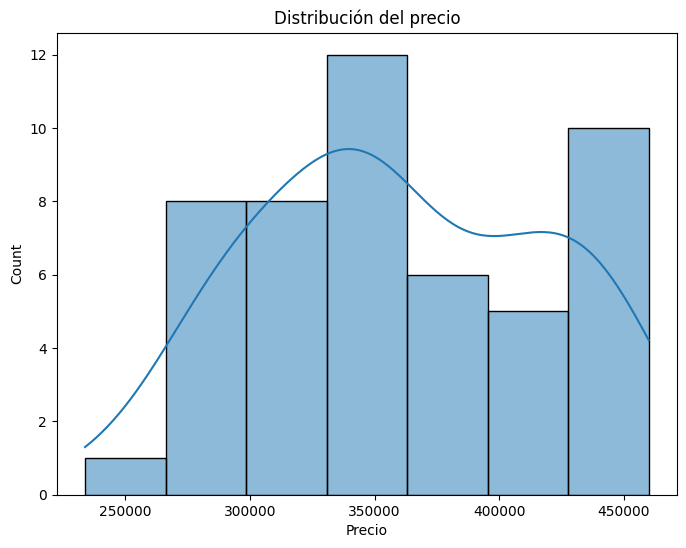

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

## price distribution

plt.figure(figsize=(8,6))
sns.histplot(df['Precio'], kde=True)
plt.title('Distribución del precio')
plt.show()

### Correlation Matrix

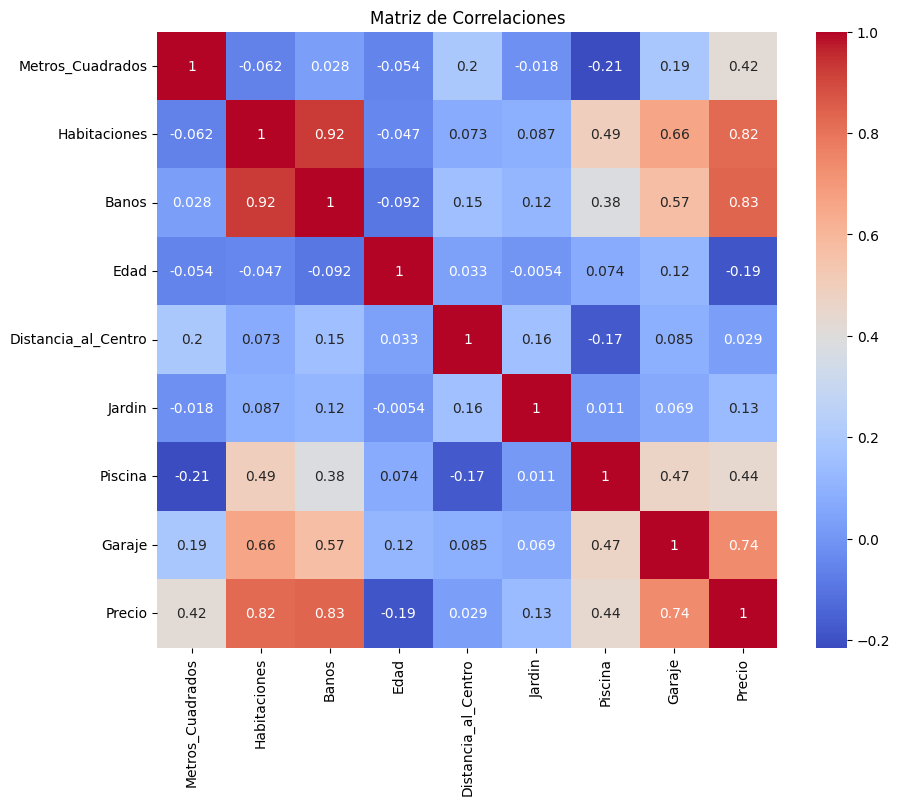

In [9]:
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlaciones')
plt.show()


### Normalization - standarization

In [44]:
# from sklearn.preprocessing import StandardScaler

# # Definir las columnas numéricas a estandarizar
# numerical_cols = ['Metros_Cuadrados', 'Habitaciones', 'Banos', 'Edad', 'Distancia_al_Centro']

# # Escalador
# scaler = StandardScaler()
# df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


### Train and Test split

In [10]:
from sklearn.model_selection import train_test_split

# Definir X (variables independientes) e y (variable objetivo)
X = df.drop(columns=['Precio'])
y = df['Precio']

# Dividir en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
from sklearn.preprocessing import StandardScaler
# Ajustar el scaler solo con los datos de entrenamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Aplicar la transformación a los datos de prueba
X_test_scaled = scaler.transform(X_test)

### Regression model

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R2 Score: {r2}')


MSE: 70741386.47941884
R2 Score: 0.9780854678859143


### P- values

In [13]:
pip install statsmodels


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import statsmodels.api as sm

# Añadir una constante para statsmodels
X_train_sm = sm.add_constant(X_train)

# Ajustar el modelo de OLS
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Mostrar el resumen con los coeficientes y p-valores
print(model_sm.summary())


                            OLS Regression Results                            
Dep. Variable:                 Precio   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     301.7
Date:                Thu, 12 Sep 2024   Prob (F-statistic):           3.41e-27
Time:                        15:30:14   Log-Likelihood:                -407.80
No. Observations:                  40   AIC:                             833.6
Df Residuals:                      31   BIC:                             848.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.056e+04   1

### Significant variables selection

In [ ]:
# Seleccionar las variables con p-valores < 0.05
significant_vars = model_sm.pvalues[model_sm.pvalues < 0.05].index

# Remover la constante 'const' de las variables significativas si existe
significant_vars = significant_vars.drop('const', errors='ignore')

# Crear nuevos datasets solo con las variables significativas
X_train_significant = X_train[significant_vars]
X_test_significant = X_test[significant_vars]

# Entrenar de nuevo el modelo con las variables significativas
model_significant = LinearRegression()
model_significant.fit(X_train_significant, y_train)

# Realizar predicciones
y_pred_significant = model_significant.predict(X_test_significant)

# Evaluar el nuevo modelo
mse_significant = mean_squared_error(y_test, y_pred_significant)
r2_significant = r2_score(y_test, y_pred_significant)

print(f'MSE (modelo ajustado): {mse_significant}')
print(f'R2 Score (modelo ajustado): {r2_significant}')


### Get the predictions

In [15]:
# Desnormalizar los datos de prueba (esto debería funcionar correctamente ahora)
X_test_original = scaler.inverse_transform(X_test_scaled)


In [16]:
# Crear un DataFrame con los resultados
df_results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# Guardar los resultados en un archivo CSV
df_results.to_csv(r'C:\Users\daniel.roman\Documents\StatisticsII\predictions_price.csv', index=False)


In [17]:
df_results.head()

,Actual,Predicted
13,336442,330202.515520
39,305128,312762.235844
30,395106,406044.261524
45,388268,372135.959884
17,459967,467266.524531


In [18]:
# Crear un DataFrame con los valores originales y las predicciones
df_predictions = pd.DataFrame({
    'Metros_Cuadrados': X_test['Metros_Cuadrados'],
    'Habitaciones': X_test['Habitaciones'],
    'Banos': X_test['Banos'],
    'Edad': X_test['Edad'],
    'Distancia_al_Centro': X_test['Distancia_al_Centro'],
    'Jardin':X_test['Jardin'],
    'Piscina':X_test['Piscina'],
    'Garaje':X_test['Garaje'],
    'Precio_Real': y_test,
    'Precio_Predicho': y_pred
})

# Guardar el DataFrame con los datos originales y las predicciones
file_path_predictions = r'C:\Users\daniel.roman\Documents\StatisticsII\predictions_vs_reals_price.csv'
df_predictions.to_csv(file_path_predictions, index=False)

file_path_predictions

'C:\\Users\\daniel.roman\\Documents\\StatisticsII\\predictions_vs_reals_price.csv'

In [19]:
df_predictions.head()

,Metros_Cuadrados,Habitaciones,Banos,Edad,Distancia_al_Centro,Jardin,Piscina,Garaje,Precio_Real,Precio_Predicho
13,1417,4,3,19,4.678125,1,1,1,336442,330202.515520
39,1839,2,1,22,2.739144,1,0,1,305128,312762.235844
30,1679,5,5,0,5.452577,0,0,1,395106,406044.261524
45,1656,4,3,4,5.291724,1,0,2,388268,372135.959884
17,1862,5,5,2,6.112244,1,1,2,459967,467266.524531
